In [ ]:
for i in range(10):
    print(i)
    i -= 1

In [11]:
from lstore.db import Database
from lstore.query import Query
from time import process_time
from random import choice, randrange

# Student Id and 4 grades
db = Database()
grades_table = db.create_table('Grades', 5, 0)
query = Query(grades_table)
keys = []

insert_time_0 = process_time()
for i in range(0, 10000):
    query.insert(906659671 + i, 93, 0, 0, 0)
    keys.append(906659671 + i)
insert_time_1 = process_time()

print("Inserting 10k records took:  \t\t\t", insert_time_1 - insert_time_0)

# Measuring update Performance
update_cols = [
    [None, None, None, None, None],
    [None, randrange(0, 100), None, None, None],
    [None, None, randrange(0, 100), None, None],
    [None, None, None, randrange(0, 100), None],
    [None, None, None, None, randrange(0, 100)],
]

update_time_0 = process_time()
for i in range(0, 10000):
    query.update(choice(keys), *(choice(update_cols)))
update_time_1 = process_time()
print("Updating 10k records took:  \t\t\t", update_time_1 - update_time_0)

# Measuring Select Performance
select_time_0 = process_time()
for i in range(0, 10000):
    query.select(choice(keys),0 , [1, 1, 1, 1, 1])
select_time_1 = process_time()
print("Selecting 10k records took:  \t\t\t", select_time_1 - select_time_0)

# Measuring Aggregate Performance
agg_time_0 = process_time()
for i in range(0, 10000, 100):
    start_value = 906659671 + i
    end_value = start_value + 100
    result = query.sum(start_value, end_value - 1, randrange(0, 5))
agg_time_1 = process_time()
print("Aggregate 10k of 100 record batch took:\t", agg_time_1 - agg_time_0)

# Measuring Delete Performance
delete_time_0 = process_time()
for i in range(0, 10000):
    query.delete(906659671 + i)
delete_time_1 = process_time()
print("Deleting 10k records took:  \t\t\t", delete_time_1 - delete_time_0)

Inserting 10k records took:  			 0.18437900000000007
Updating 10k records took:  			 0.17697699999999994
Selecting 10k records took:  			 0.08672100000000027
Aggregate 10k of 100 record batch took:	 0.037887000000000004
Deleting 10k records took:  			 0.03844000000000003


In [12]:
import seaborn as sns

In [13]:
insert_time = insert_time_1 - insert_time_0
update_time = update_time_1 - update_time_0
select_time = select_time_1 - select_time_0
agg_time = agg_time_1 - agg_time_0
delete_time = delete_time_1 - delete_time_0

In [17]:
times = [insert_time, update_time, select_time, agg_time, delete_time]
labels = ["insert_time", "update_time", "select_time", 'agg_time', 'delete_time']

[Text(0.5, 0, 'Query Methods'), Text(0, 0.5, 'Time (in seconds)')]

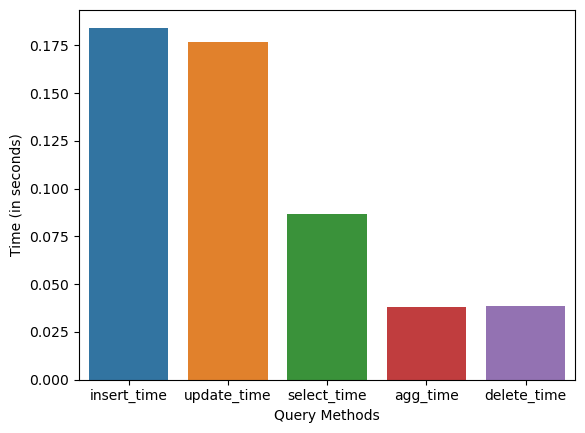

In [22]:
fig = sns.barplot(x = labels, y = times)
fig.set(xlabel='Query Methods', ylabel='Time (in seconds)')